# Stratified K-Fold for Regression Problem

We want a cross-validation scheme where the validation sets (folds) have a similar target distribution to the overall training set. Scikit-learn has the [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) for classification, but no equivalent for regression problems, so we adapt this using binning of the target

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

# Mute warnings
warnings.filterwarnings('ignore')

## Continuous Target Distribution

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

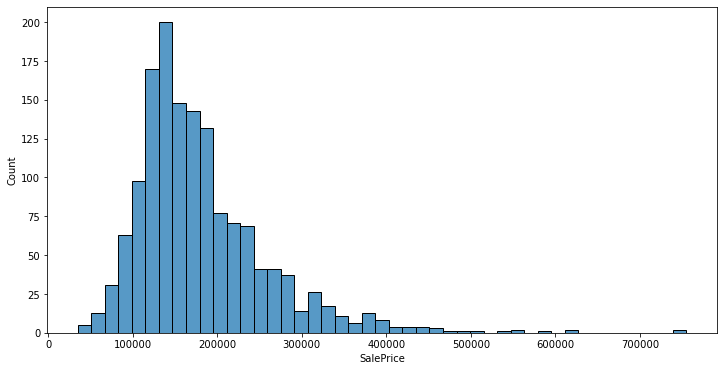

In [2]:
# Global variables for testing changes to this notebook quickly
FOLD_SEED = 0
NUM_FOLDS = 3

# Load the training data
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
y_train = train['SalePrice'].copy()

# Target Distribution
plt.figure(figsize=(12,6))
sns.histplot(data=y_train, kde=False, bins = 45)

## Binned Target Distribution

<AxesSubplot:ylabel='Count'>

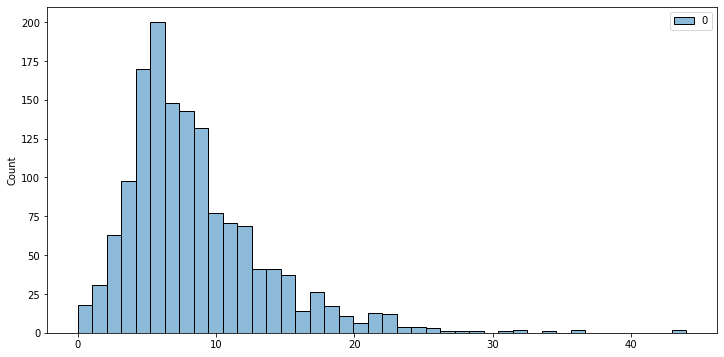

In [3]:
binner = KBinsDiscretizer(n_bins = 45, encode = 'ordinal', strategy = 'uniform')
y_bins = binner.fit_transform(pd.DataFrame(data=y_train))

# Binned Distribution
plt.figure(figsize=(12,6))
sns.histplot(data=y_bins, kde=False)

## Stratified K-Fold

In [4]:
# Create Folds
train["kfold"] = -1
kf = StratifiedKFold(NUM_FOLDS, shuffle = True, random_state = FOLD_SEED) 
for fold, (train_idx, valid_idx) in enumerate(kf.split(train, y_bins)):
    train.loc[valid_idx,"kfold"] = fold

## Fold Target Distributions

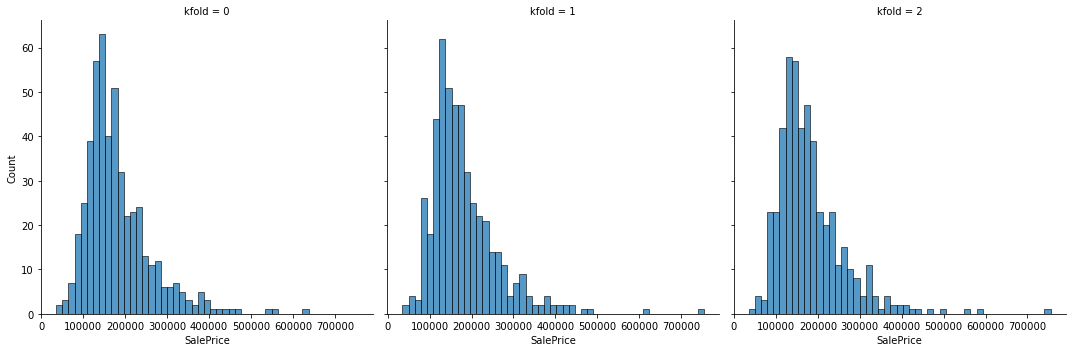

In [5]:
sns.displot(train, x="SalePrice", col="kfold", col_wrap = 3)